# Import and Cleaning

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from functions import scale_variables
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
data = pd.read_csv("../data/fda_approved/fda_rdkit_pre_processed_descriptors.csv")
data.head()

,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
Y = data["oral"]
Y = Y.astype(float)
Y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: oral, dtype: float64

In [4]:
X = data.iloc[:, 14:]
X.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.055556,-0.333333,6.055556,0.333333,0.242956,59.072,54.032,59.048347,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.451389,-0.439815,9.451389,0.439815,0.301333,75.067,70.027,75.032028,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.229167,-0.939815,9.229167,0.939815,0.256644,76.055,72.023,76.027277,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.951389,0.683642,4.951389,0.683642,0.419021,77.152,70.096,77.029920,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.555556,-0.611111,9.555556,0.611111,0.373753,78.136,72.088,78.013936,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# separate train an test datasets

np.random.seed(983538)
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.25)

# Scaling datsets

In [6]:
# TRAIN

x_train = scale_variables(x_train)

# adding constant
x_train = sm.add_constant(x_train)

x_train.head()

,const,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.0,-0.233633,-0.121012,-0.233633,-0.434170,-0.087580,-0.959181,-0.953438,-0.958414,-0.898339,...,-0.169674,-0.255676,-0.257462,-0.110038,-0.106714,-0.11948,-0.143032,-0.14292,-0.197891,-0.209697
1,1.0,-0.670808,0.250583,-0.670808,0.038471,-0.274533,-1.121891,-1.127000,-1.121163,-1.050373,...,-0.169674,-0.255676,-0.257462,-0.110038,-0.106714,-0.11948,-0.143032,-0.14292,-0.197891,-0.209697
2,1.0,-0.070931,0.310987,-0.070931,-0.590331,-0.876620,-0.703534,-0.680740,-0.702678,-0.655084,...,-0.169674,-0.255676,-0.257462,-0.110038,-0.106714,-0.11948,-0.143032,-0.14292,-0.197891,-0.209697
3,1.0,-0.053017,0.556520,-0.053017,0.628262,0.832885,-0.772753,-0.779561,-0.772075,-0.715898,...,-0.169674,-0.255676,-0.257462,-0.110038,-0.106714,-0.11948,-0.143032,-0.14292,-0.197891,-0.209697
4,1.0,-0.546982,0.300342,-0.546982,-0.538983,0.305230,-0.877443,-0.903725,-0.876722,-0.776711,...,-0.169674,-0.255676,-0.257462,-0.110038,-0.106714,-0.11948,-0.143032,-0.14292,-0.197891,-0.209697


In [7]:
# TEST

x_test = scale_variables(x_test)

# adding constant
x_test = sm.add_constant(x_test)

x_test.head()

,const,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.0,-0.108788,0.548420,-0.108788,-0.574177,0.375218,-1.172675,-1.193258,-1.171984,-1.082982,...,-0.188113,-0.231362,-0.223409,-0.131024,-0.122431,-0.103252,-0.162879,-0.133774,-0.18454,-0.19868
1,1.0,0.120416,0.352366,0.120416,-0.441687,0.056207,-0.246807,-0.285004,-0.246079,-0.133643,...,-0.188113,-0.231362,-0.223409,-0.131024,-0.122431,-0.103252,-0.162879,-0.133774,-0.18454,-0.19868
2,1.0,-0.069332,-0.115631,-0.069332,-0.222720,-0.681442,-0.320889,-0.268118,-0.325194,-0.478857,...,-0.188113,-0.231362,-0.223409,-0.131024,-0.122431,-0.103252,-0.162879,-0.133774,-0.18454,-0.19868
3,1.0,-3.291419,1.525143,-3.291419,3.655933,0.611760,-0.581288,-0.595412,-0.580779,-0.536393,...,-0.188113,-0.231362,-0.223409,-0.131024,-0.122431,-0.103252,-0.162879,-0.133774,-0.18454,-0.19868
4,1.0,-2.812025,1.443957,-2.812025,3.130999,0.805018,-0.575088,-0.679050,-0.574567,-0.392554,...,-0.188113,-0.231362,-0.223409,-0.131024,-0.122431,-0.103252,-0.162879,-0.133774,-0.18454,-0.19868


# Logistic Regression

In [8]:
# adjusting y_train index and type

y_train.index = range(0, x_train.shape[0])


In [9]:
# calculatin model
model = sm.Logit(y_train, x_train).fit()
results = model.summary()

         Current function value: 0.505730
         Iterations: 35


/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
# converting results summary to pandas dataframe
results_html = results.tables[1].as_html()
results_df = pd.read_html(results_html, header=0, index_col=0)[0]
print(results_df.shape)
results_df.head()

(202, 6)


,coef,std err,z,P>|z|,[0.025,0.975]
const,0.9702,2373.281,0.000,1.000,-4650.576,4652.516
MaxEStateIndex,0.0506,NaN,NaN,NaN,NaN,NaN
MinEStateIndex,-0.2338,0.232,-1.010,0.313,-0.688,0.220
MaxAbsEStateIndex,0.0506,NaN,NaN,NaN,NaN,NaN
MinAbsEStateIndex,0.0005,0.116,0.004,0.997,-0.228,0.229


In [11]:
statisctically_relevant_attributes = results_df[results_df["P>|z|"] < 0.05]
print(statisctically_relevant_attributes.shape)
statisctically_relevant_attributes

(15, 6)


,coef,std err,z,P>|z|,[0.025,0.975]
qed,0.2926,0.143,2.045,0.041,0.012,0.573
HeavyAtomMolWt,389.5948,173.738,2.242,0.025,49.075,730.115
NumValenceElectrons,124.4838,53.120,2.343,0.019,20.370,228.597
BCUT2D_LOGPLOW,-0.5446,0.277,-1.965,0.049,-1.088,-0.001
BalabanJ,-0.5684,0.243,-2.342,0.019,-1.044,-0.093
Chi0n,76.2535,38.429,1.984,0.047,0.933,151.574
HallKierAlpha,-4.9456,2.052,-2.410,0.016,-8.968,-0.923
Kappa2,2.5264,1.117,2.262,0.024,0.338,4.715
HeavyAtomCount,-186.1460,79.497,-2.342,0.019,-341.957,-30.335
NOCount,-23.3273,7.617,-3.063,0.002,-38.256,-8.399


In [12]:
y_predict = model.predict(x_test)
y_predict

0      1.000000e+00
1      1.000000e+00
2      1.000000e+00
3      9.997875e-01
4      1.000000e+00
           ...     
469    9.999992e-01
470    1.000000e+00
471    4.570946e-30
472    1.000000e+00
473    5.131595e-12
Length: 474, dtype: float64

In [13]:
# converting probability to labels
def convert_prob_to_label(prob, cutoff = 0.5):
    label = None
    if prob > cutoff:
        label = 1
    else:
        label = 0
    return label

In [14]:
y_predict_labels = list(map(convert_prob_to_label, y_predict))
y_predict_labels = np.asarray(y_predict_labels)
y_predict_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [15]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_predict_labels)
conf_matrix

array([[ 81,  99],
       [126, 168]])

In [16]:
mis_rate = (conf_matrix[[1],[0]].flat[0] + conf_matrix[[0],[1]].flat[0])/len(y_test)
print(f"Misclassification rate = {mis_rate :.3f}")

Misclassification rate = 0.475


Miclassification rate goes from 0 to 1, and should be as low as possible. 0.475 is bad, and pretty close to random guessing (which owuld be 0.5). Kinda shit.

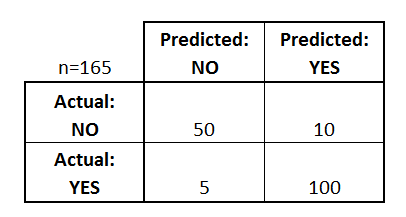

In [17]:
# Como fazer CV am logistic regression (provavelmente seria bom fazer)

# from sklearn.model_selection import RepeatedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score
# X = df.loc[ : , ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
# y = df[['target']]

# cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
# model = LogisticRegression()

# # getting misclassification rate
# scores = 1 - cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# import seaborn as sns
# ax = sns.histplot(x=scores, kde=True)

# TREES

## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from time import perf_counter, gmtime, strftime


In [19]:
def best_params_grid(x, y, model_params, n_splits=5, n_repeats=10):
    '''DataFrame, DataFrame, Dictionary, int, int --> DataFrame

    -----------------------------------------------------------------------------

    This function recieves the X and Y dataframes. It also recieves a dictionary, 
    with the model and parameters to be testes. As the function uses RepeatedStratifiedKFold,
    it can also recieve the n_splits and n_repeats parameters.
    Tha function will execute GridSearchCV on all parameters for the model.
    It returns two datasets, the first one is formatted to contain only the relevant information.
    The second one constains all information about the models, in case it's necessary'''

    t0 = perf_counter()
    np.random.seed(1428)

    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats)
    scores = []
    full_results = {}

    for model_name, mp in model_params.items():
        now = strftime("%H:%M", gmtime())
        print(f"Starting Grid Search for {model_name}: {now}")
        clf =  GridSearchCV(mp['model'], mp['params'], cv=cv,
                                return_train_score=False, scoring = 'roc_auc')
        clf.fit(x, y)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })
        print(f"Finished Grid Search for {model_name}")

        full_results[model_name] = pd.DataFrame(clf.cv_results_)
        
    important_result = pd.DataFrame(scores,columns=['model','best_score','best_params'])
    t1 = perf_counter() - t0
    print(f'Tempo de execução: {(t1/60): 0.1f} minutos')
    return important_result, full_results

In [20]:
# Aqui eu vou deixar comentado, mas é um exemplo lgl até dos parâmetros pra testar
# mas eu tentei rodar isso, e o decision tree até foi, o random forest demorou bastante
# mas foi tbm, mas o boosting ficou MTO tempo, tem q usar bem menos parấmetro pra testar assim

# model_params = {
#     'Decision Tree': {
#         'model': DecisionTreeClassifier(),
#         'params': {
#             'criterion': ['gini', 'entropy', 'log_loss'],
#             'max_depth': [1, 2, 3, 4, 5, 6, 10, 15, 20],
#         }
#     },
#     'Random Forest': {
#         'model': RandomForestClassifier(),
#         'params': {
#             'n_estimators': [10, 50, 100, 200, 500], # number of trees
#             'criterion': ['gini', 'entropy'],
#             'max_depth': [1, 2, 3, 4, 5, 6, 10, 15],
#             'bootstrap': [True, False],
#         }
#     },
#     'Boosting': {
#         'model': GradientBoostingClassifier(),
#         'params': {
#             'loss': ['log_loss', 'exponential'],
#             'n_estimators' : [100, 1000, 3000, 5000], # number of trees
#             'learning_rate': [0.0001, 0.001, 0.01, 0.1], # alfa
#             'max_depth': [1, 2, 3, 4, 5, 6, 10, 15],
#         }
#     },
# }

In [23]:
model_params = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini'],
            'max_depth': [5, 6, 10],
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100], # number of trees
            'criterion': ['gini'],
            'max_depth': [1, 5, 10],
            'max_features': ["sqrt", x_train.shape[1]] # m, number of features considered in split. When it is equal to all predictor of dataset, it is bagging
            #'bootstrap': [True, False],
        }
    },
    'Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'loss': ['log_loss'],
            'n_estimators' : [100], # number of trees
            'learning_rate': [0.01, 0.1], # alfa
            'max_depth': [10],
        }
    },
}

Bagging is just Random Forest, in which max_features is equal to the total number of features. Therefore, bagging will be done in the RF algorithm, and compared to RF.

In [24]:
result, full_results = best_params_grid(x_train, y_train, model_params)

Starting Grid Search for Decision Tree: 14:41
Finished Grid Search for Decision Tree
Starting Grid Search for Random Forest: 14:41
Finished Grid Search for Random Forest
Starting Grid Search for Boosting: 14:53
Finished Grid Search for Boosting
Tempo de execução:  25.9 minutos


In [25]:
result

,model,best_score,best_params
0,Decision Tree,0.623863,"{'criterion': 'gini', 'max_depth': 5}"
1,Random Forest,0.731665,"{'criterion': 'gini', 'max_depth': 10, 'max_fe..."
2,Boosting,0.726113,"{'learning_rate': 0.1, 'loss': 'log_loss', 'ma..."


In [26]:
full_results["Decision Tree"]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044552,0.002603,0.003041,0.000281,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.623300,0.578911,0.644226,...,0.674769,0.638836,0.582627,0.678732,0.623423,0.639441,0.580519,0.623863,0.034228,1
1,0.051939,0.002526,0.003013,0.000351,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.633684,0.610539,0.670178,...,0.691814,0.615136,0.542896,0.651275,0.612546,0.643782,0.618687,0.620295,0.038589,2
2,0.075456,0.003681,0.002958,0.000111,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.600884,0.589339,0.576403,...,0.623632,0.574232,0.549409,0.568615,0.521226,0.611059,0.574758,0.595065,0.038581,3


In [27]:
full_results["Random Forest"]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.065401,0.003018,0.005516,0.000254,gini,1,sqrt,50,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.648567,...,0.621317,0.676662,0.603421,0.645414,0.598580,0.664168,0.752157,0.649687,0.034269,10
1,0.131708,0.009069,0.008342,0.000859,gini,1,sqrt,100,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.642158,...,0.637968,0.708938,0.605644,0.652859,0.613285,0.678372,0.747054,0.651033,0.034978,9
2,0.331526,0.008126,0.005590,0.000214,gini,1,202,50,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.647390,...,0.609796,0.672875,0.590369,0.631607,0.592824,0.667982,0.734559,0.637340,0.036664,12
3,0.664940,0.011335,0.008223,0.000297,gini,1,202,100,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.642368,...,0.611164,0.677478,0.599210,0.636438,0.601220,0.681424,0.727904,0.640092,0.037011,11
4,0.147545,0.002966,0.006045,0.000225,gini,5,sqrt,50,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.697295,...,0.696128,0.725984,0.693503,0.707112,0.666297,0.700758,0.800400,0.709863,0.030917,8
5,0.289741,0.003048,0.008859,0.000279,gini,5,sqrt,100,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.708490,...,0.704072,0.721828,0.676344,0.707218,0.682349,0.705650,0.783460,0.711709,0.027929,7
6,1.459907,0.042557,0.006148,0.000433,gini,5,202,50,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.721516,...,0.730245,0.728983,0.664574,0.711284,0.666719,0.698758,0.799663,0.713996,0.031272,6
7,2.907264,0.078816,0.008984,0.000345,gini,5,202,100,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.715762,...,0.715751,0.725773,0.677600,0.724325,0.689371,0.700810,0.796138,0.716732,0.029065,5
8,0.226777,0.002212,0.006417,0.000119,gini,10,sqrt,50,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.718691,...,0.716172,0.740977,0.687016,0.733407,0.700195,0.700547,0.785459,0.725819,0.028117,3
9,0.461564,0.034009,0.009981,0.000688,gini,10,sqrt,100,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.731874,...,0.719539,0.757023,0.700408,0.740694,0.705053,0.716698,0.799348,0.731665,0.027660,1


In [28]:
full_results["Boosting"]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_max_depth,param_n_estimators,params,split0_test_score,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,8.061603,0.215495,0.004563,0.000182,0.01,log_loss,10,100,"{'learning_rate': 0.01, 'loss': 'log_loss', 'm...",0.679300,...,0.636285,0.634680,0.678542,0.726860,0.673584,0.633654,0.719986,0.668406,0.032474,2
1,8.368799,0.155090,0.004795,0.000239,0.1,log_loss,10,100,"{'learning_rate': 0.1, 'loss': 'log_loss', 'ma...",0.716939,...,0.714962,0.703862,0.713800,0.786948,0.751571,0.707386,0.728430,0.726113,0.022483,1


# Decision Tree

## Fitting Tree

In [29]:
result.iloc[0,:]

model                                  Decision Tree
best_score                                  0.623863
best_params    {'criterion': 'gini', 'max_depth': 5}
Name: 0, dtype: object

In [30]:
result.iloc[0,2]

{'criterion': 'gini', 'max_depth': 5}

With these best parameters, we can train a model in the entire training dataset, and test it in the test dataset

In [32]:
decision_tree = DecisionTreeClassifier(criterion="gini", max_depth=5).fit(x_train, y_train)

In [61]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

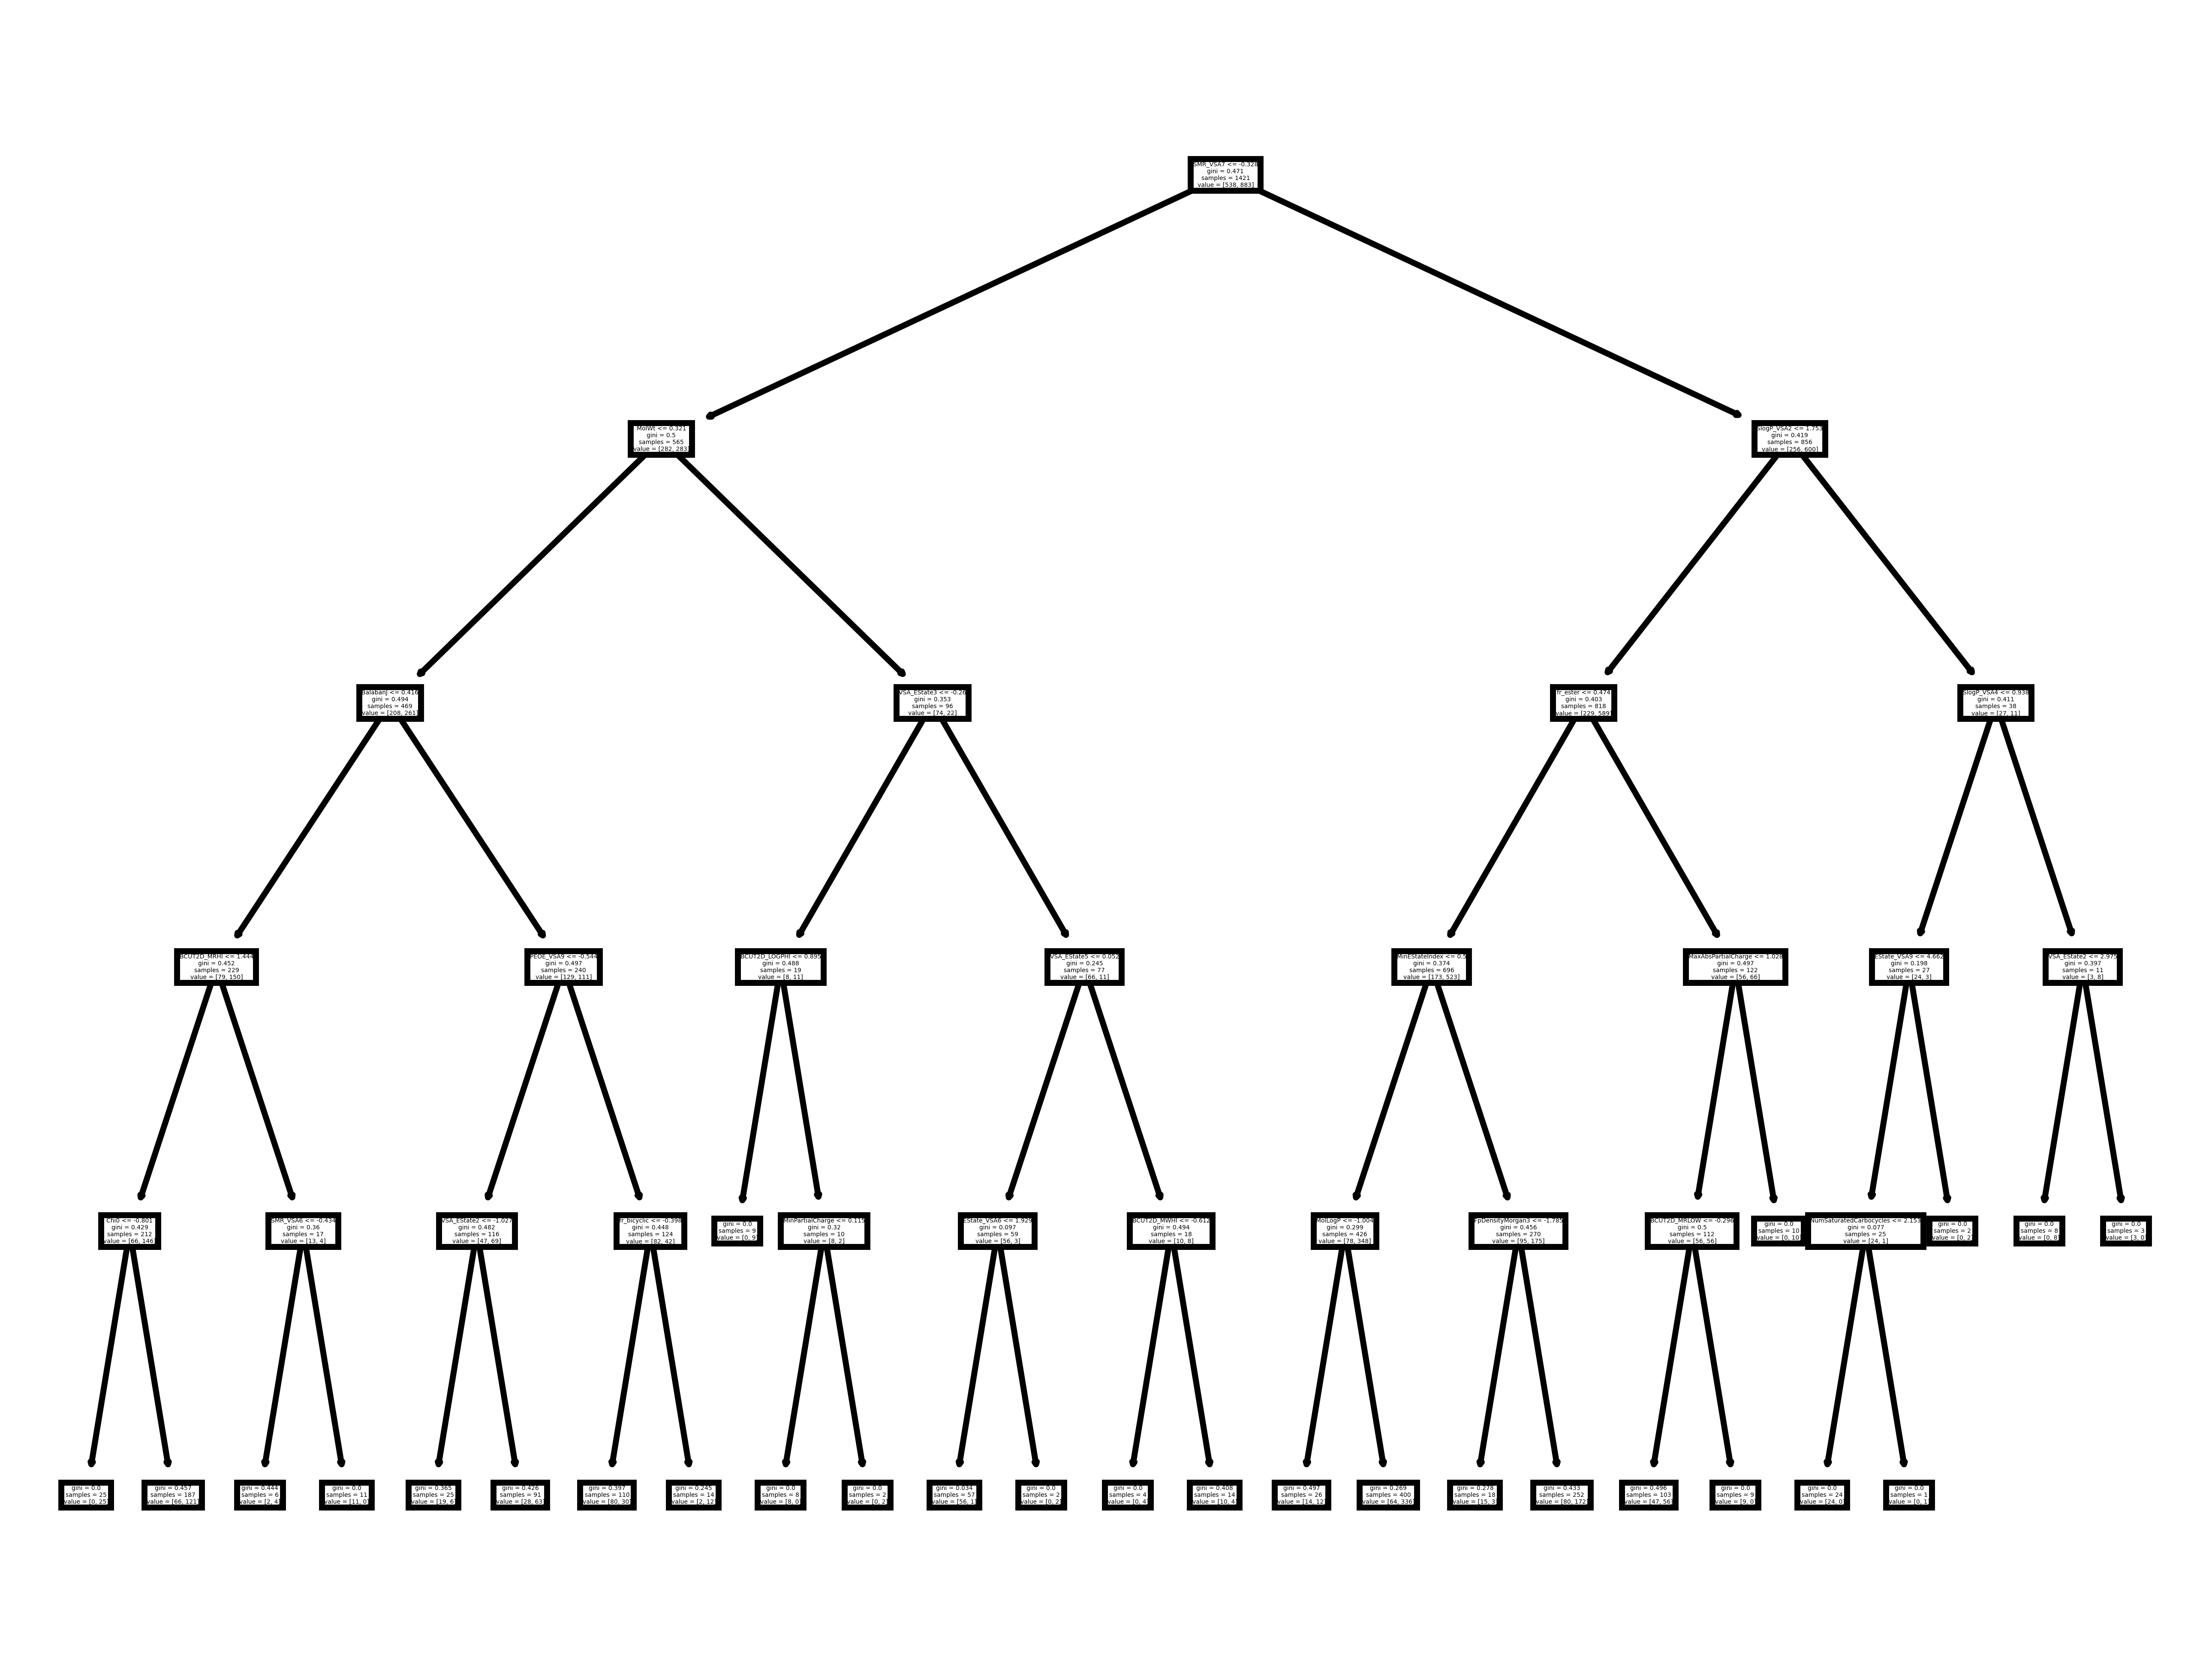

In [51]:
fig, ax = plt.subplots()
fig.dpi = 1000

tree.plot_tree(decision_tree, ax=ax, feature_names=list(x_train.columns))
plt.show()

## Feature Importance

In [84]:
# Print the feature importances
feat_importances = pd.DataFrame(decision_tree.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.head()

,Importance
const,0.000000
MaxEStateIndex,0.000000
MinEStateIndex,0.048984
MaxAbsEStateIndex,0.000000
MinAbsEStateIndex,0.000000


<Axes: >

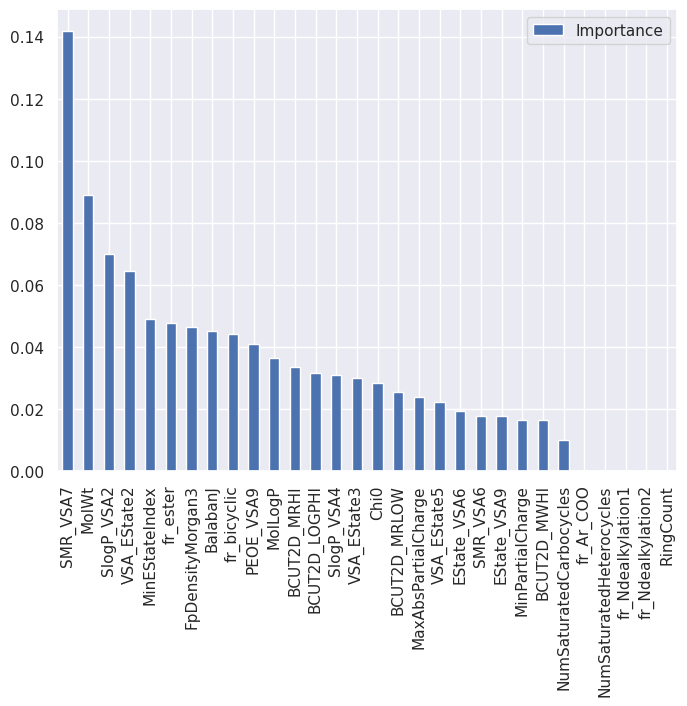

In [82]:
# making bar plot
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.iloc[:30,:].plot(kind='bar', figsize=(8,6))

In [87]:
decision_tree_feat_importance = feat_importances[feat_importances.Importance > 0].sort_values
decision_tree_feat_importance

<bound method DataFrame.sort_values of                          Importance
MinEStateIndex             0.048984
MolWt                      0.088873
MinPartialCharge           0.016654
MaxAbsPartialCharge        0.023888
FpDensityMorgan3           0.046535
BCUT2D_MWHI                0.016521
BCUT2D_LOGPHI              0.031554
BCUT2D_MRHI                0.033672
BCUT2D_MRLOW               0.025465
BalabanJ                   0.045209
Chi0                       0.028592
PEOE_VSA9                  0.040920
SMR_VSA6                   0.017960
SMR_VSA7                   0.141772
SlogP_VSA2                 0.070073
SlogP_VSA4                 0.030885
EState_VSA6                0.019412
EState_VSA9                0.017764
VSA_EState2                0.064471
VSA_EState3                0.030166
VSA_EState5                0.022239
NumSaturatedCarbocycles    0.009992
MolLogP                    0.036396
fr_bicyclic                0.044150
fr_ester                   0.047853>

## Make Predictions

In [94]:
y_predicted = decision_tree.predict(x_test)

## Test Error

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

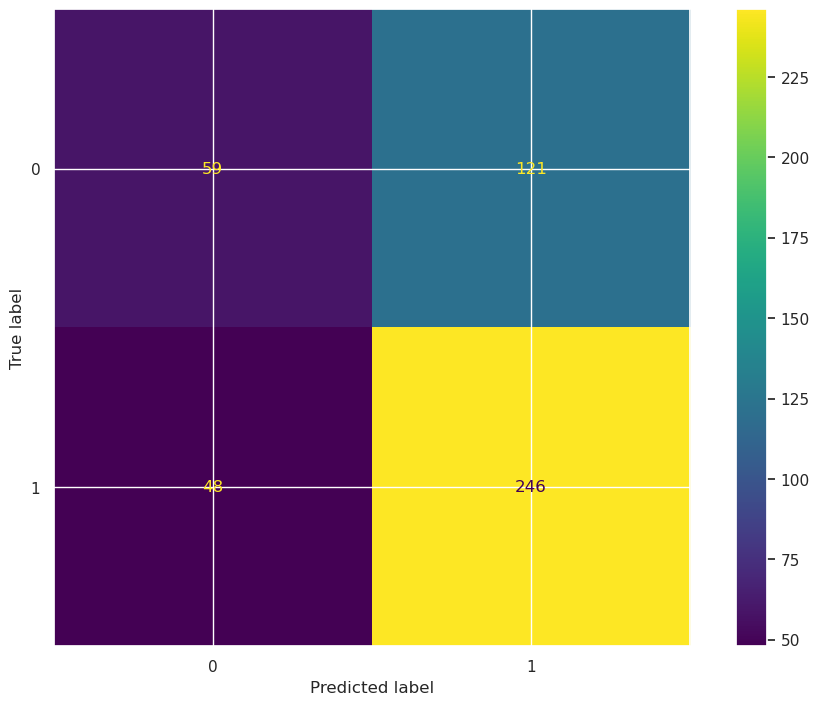

In [95]:
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [96]:
mis_rate = (cm[[1],[0]].flat[0] + cm[[0],[1]].flat[0])/len(y_test)
mis_rate

0.35654008438818563

## ROC/AUC

In [103]:
# Calculating AUC
proba = decision_tree.predict_proba(x_test)
proba = proba[:, 1]

auc = roc_auc_score(y_test, proba)
print(f"AUC: {auc}")

AUC: 0.6446712018140589


In [100]:
# Criando informações pro gráfico da curva ROC

#Criando linha da diagonal

r_proba = [0 for _ in range(len(y_test))]
r_fpr, r_tpr, _ = roc_curve(y_test, r_proba)
r_auc = roc_auc_score(y_test, r_proba)

#Criando linha da curva ROC

fpr, tpr, _ = roc_curve(y_test, proba)

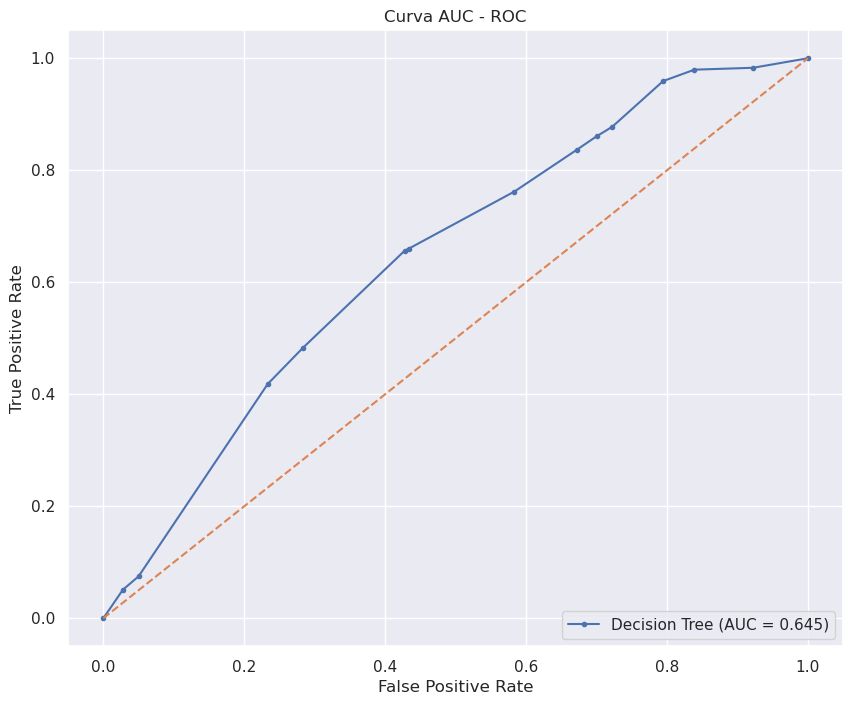

In [102]:
# Criando gráfico da curva ROC

#FigSize
plt.figure(figsize=(10,8))

#Plot
plt.plot(fpr, tpr, '.-', label = 'Decision Tree (AUC = %0.3f)' % auc)
plt.plot(r_fpr, r_tpr, '--', label = '')

#Title
plt.title('Curva AUC - ROC')
#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show legend
plt.legend(loc=4)
#Show plot
plt.show()
     

# Random Forest

## Fitting Model

In [104]:
result.iloc[1,:]

model                                              Random Forest
best_score                                              0.731665
best_params    {'criterion': 'gini', 'max_depth': 10, 'max_fe...
Name: 1, dtype: object

In [106]:
rf_params = result.iloc[1,2]
rf_params

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [112]:
random_forest = RandomForestClassifier(**rf_params).fit(x_train, y_train)

## Feature Importance based on Mean Decrease in Impurity

In [124]:
# Print the feature importances
feat_importances = pd.DataFrame(random_forest.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.head()

,Importance
const,0.000000
MaxEStateIndex,0.009804
MinEStateIndex,0.009768
MaxAbsEStateIndex,0.010687
MinAbsEStateIndex,0.009871


<Axes: >

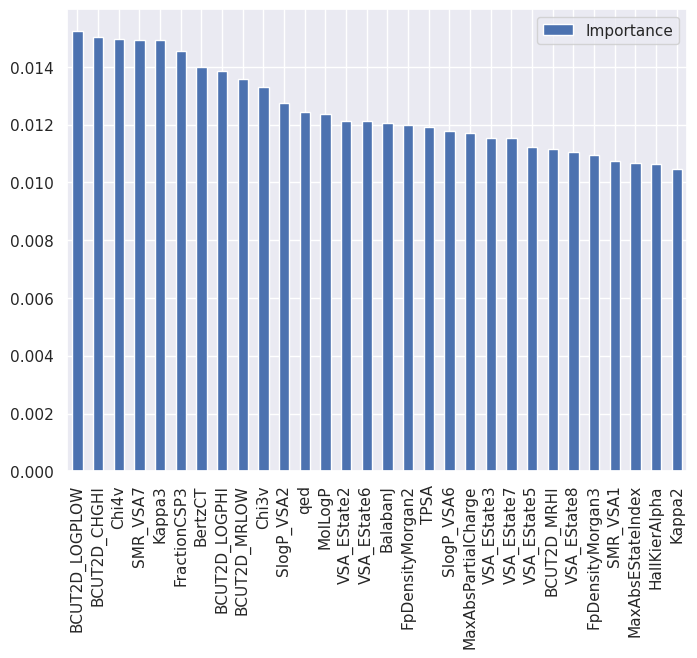

In [125]:
# making bar plot
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.iloc[:30,:].plot(kind='bar', figsize=(8,6))

## Make Predictions

In [126]:
y_predicted_rf = random_forest.predict(x_test)

## Test Error

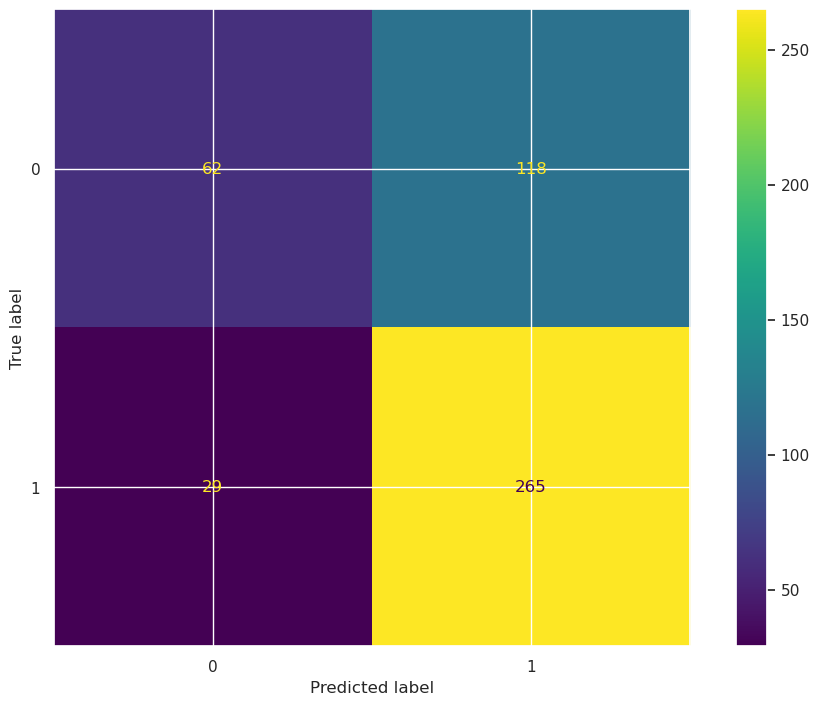

In [127]:
cm = confusion_matrix(y_test, y_predicted_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [128]:
mis_rate = (cm[[1],[0]].flat[0] + cm[[0],[1]].flat[0])/len(y_test)
mis_rate

0.310126582278481

## ROC/AUC

In [129]:
# Calculating AUC
proba = random_forest.predict_proba(x_test)
proba = proba[:, 1]

auc = roc_auc_score(y_test, proba)
print(f"AUC: {auc}")

AUC: 0.692838246409675


In [130]:
# Criando informações pro gráfico da curva ROC

#Criando linha da diagonal

r_proba = [0 for _ in range(len(y_test))]
r_fpr, r_tpr, _ = roc_curve(y_test, r_proba)
r_auc = roc_auc_score(y_test, r_proba)

#Criando linha da curva ROC

fpr, tpr, _ = roc_curve(y_test, proba)

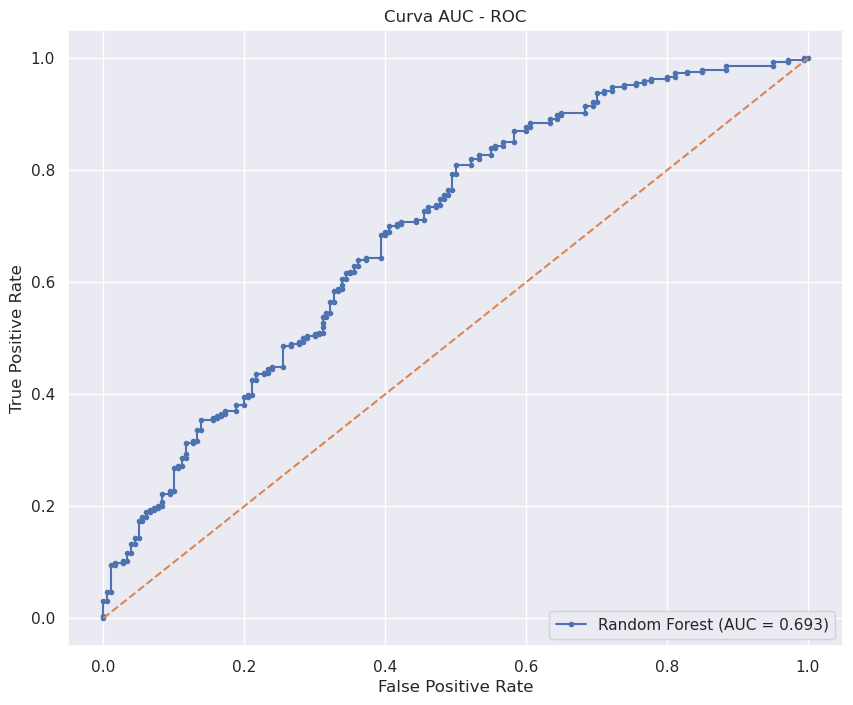

In [131]:
# Criando gráfico da curva ROC

#FigSize
plt.figure(figsize=(10,8))

#Plot
plt.plot(fpr, tpr, '.-', label = 'Random Forest (AUC = %0.3f)' % auc)
plt.plot(r_fpr, r_tpr, '--', label = '')

#Title
plt.title('Curva AUC - ROC')
#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show legend
plt.legend(loc=4)
#Show plot
plt.show()
     

# Boosting

## FItting Tree

In [134]:
result.iloc[2,:]

model                                                   Boosting
best_score                                              0.726113
best_params    {'learning_rate': 0.1, 'loss': 'log_loss', 'ma...
Name: 2, dtype: object

In [135]:
boosting_params = result.iloc[2,2]
boosting_params

{'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 10,
 'n_estimators': 100}

In [136]:
boosting = GradientBoostingClassifier(**boosting_params).fit(x_train, y_train)

## Feature Importance based on Mean Decrease in Impurity

In [138]:
# Print the feature importances
feat_importances = pd.DataFrame(boosting.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.head()

,Importance
const,0.000000
MaxEStateIndex,0.006470
MinEStateIndex,0.016932
MaxAbsEStateIndex,0.005395
MinAbsEStateIndex,0.021428


<Axes: >

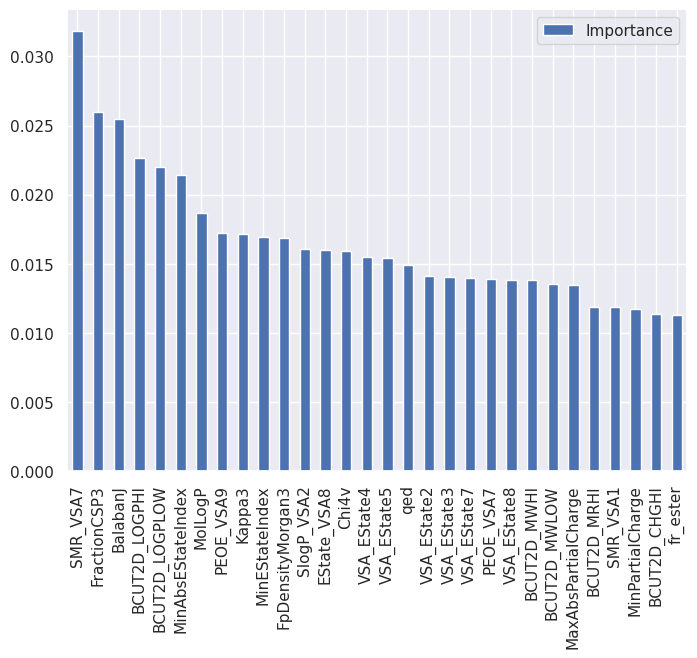

In [139]:
# making bar plot
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.iloc[:30,:].plot(kind='bar', figsize=(8,6))

## Make Predictions

In [140]:
y_predicted_boo = boosting.predict(x_test)

## Test Error

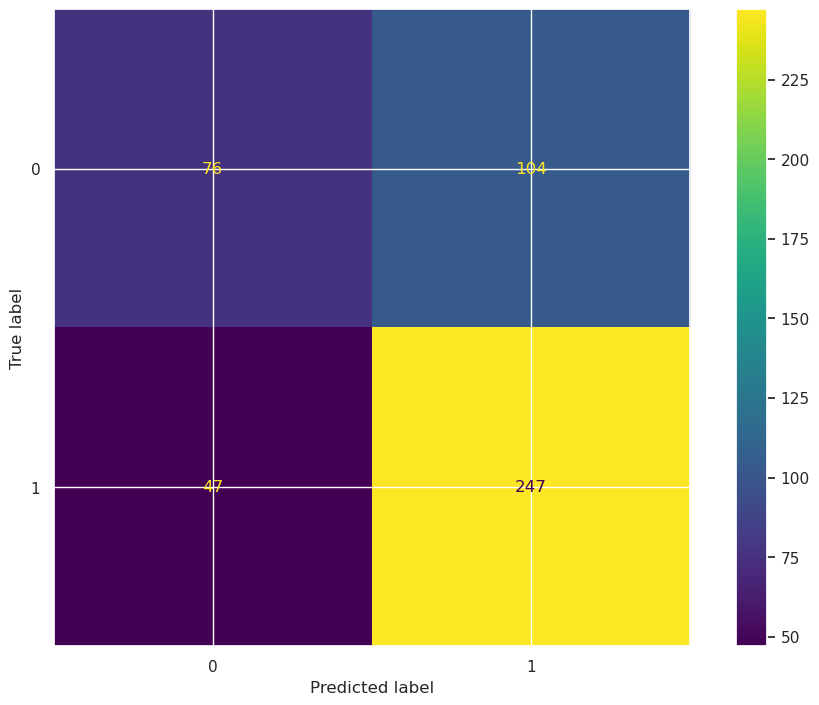

In [141]:
cm = confusion_matrix(y_test, y_predicted_boo)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [142]:
mis_rate = (cm[[1],[0]].flat[0] + cm[[0],[1]].flat[0])/len(y_test)
mis_rate

0.31856540084388185

## ROC/AUC

In [143]:
# Calculating AUC
proba = random_forest.predict_proba(x_test)
proba = proba[:, 1]

auc = roc_auc_score(y_test, proba)
print(f"AUC: {auc}")

AUC: 0.692838246409675


In [150]:
# Criando informações pro gráfico da curva ROC

#Criando linha da diagonal

r_proba = [0 for _ in range(len(y_test))]
r_fpr, r_tpr, _ = roc_curve(y_test, r_proba)
r_auc = roc_auc_score(y_test, r_proba)

#Criando linha da curva ROC

fpr, tpr, _ = roc_curve(y_test, proba)

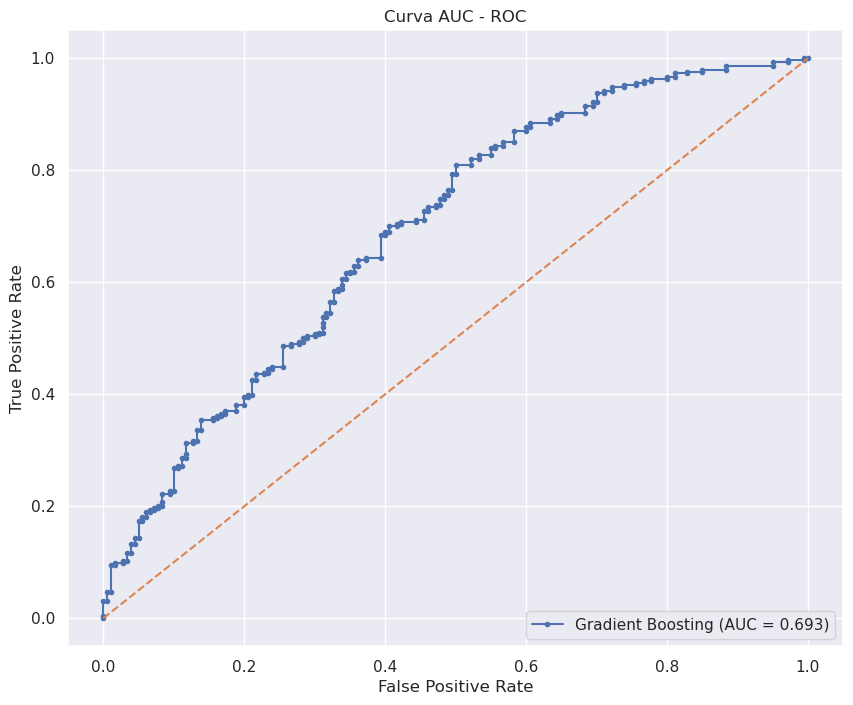

In [153]:
# Criando gráfico da curva ROC

#FigSize
plt.figure(figsize=(10,8))

#Plot
plt.plot(fpr, tpr, '.-', label = 'Gradient Boosting (AUC = %0.3f)' % auc)
plt.plot(r_fpr, r_tpr, '--', label = '')

#Title
plt.title('Curva AUC - ROC')
#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show legend
plt.legend(loc=4)
#Show plot
plt.show()
     